In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:

from scipy.stats import rv_continuous
from scipy.interpolate import interp1d
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
from py_unsio import *
import os
import wkbl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
import probfit
from matplotlib.colors import LogNorm
import glob

In [3]:
path = "/data/OWN/paramstest/e01_t01/output_00038"
myhalo= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)
print "loaded"


loading Dark matter..
loading Stars..
loading Gas..
loaded


In [4]:
cen = myhalo.dm.Clumps.pos3d[myhalo.dm.Clumps.cell==myhalo.dm.Clumps.cell.max()]
myhalo.center_shift(cen)
myhalo.r_virial(600)
print "cutted"
nucenter = nbe.real_center(myhalo.dm.pos3d, myhalo.dm.mass)
myhalo.center_shift(nucenter)
myhalo.redefine(4.5)

| r_200 = 227.9296875
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.441e+12 M_sun
| p_dm_200      =  9.314e+05 particles
| stellar mass  =  1.396e+11 M_sun
| p_st_200      =  4.858e+06 psrticles
| gas mass      =  1.328e+11 M_sun
| p_gs_200      =  2.160e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |21, 0, 0|
| D =| 0,21, 0|
|    | 0, 0, 2|
cutted


In [5]:
def face_on_dm(sim,lims,points):
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.dm.pos3d[:,0], 
                                       sim.dm.pos3d[:,1],
                                       bins=(edges, edges),
                                       weights=sim.dm.mass)
    result = H.T
    return result, edges

def face_on_st(sim,lims,points,thikness=.5):
    disk = (np.abs(sim.st.pos3d[:,2])<thikness)
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.st.pos3d[disk,0], 
                                       sim.st.pos3d[disk,1],
                                       bins=(edges, edges),
                                       weights=sim.st.mass[disk])
    result = H.T
    return result, edges

def face_on_gs(sim,lims,points,thikness=.9):
    disk = (np.abs(sim.gs.pos3d[:,2])<thikness)
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.gs.pos3d[disk,0], 
                                       sim.gs.pos3d[disk,1],
                                       bins=(edges, edges),
                                       weights=sim.gs.mass[disk])
    result = H.T
    return result, edges

def edge_on_st(sim,lims,points):
    #disk = sim.st.pos3d[:,2]
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.st.pos3d[:,0], 
                                       sim.st.pos3d[:,2],
                                       bins=(edges, edges),
                                       weights=sim.st.mass)
    result = H.T
    return result, edges
    
def edge_on_gs(sim,lims,points):
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.gs.pos3d[:,0], 
                                       sim.gs.pos3d[:,2],
                                       bins=(edges, edges),
                                       weights=sim.gs.mass)
    result = H.T
    return result, edges
    

<IPython.core.display.Javascript object>


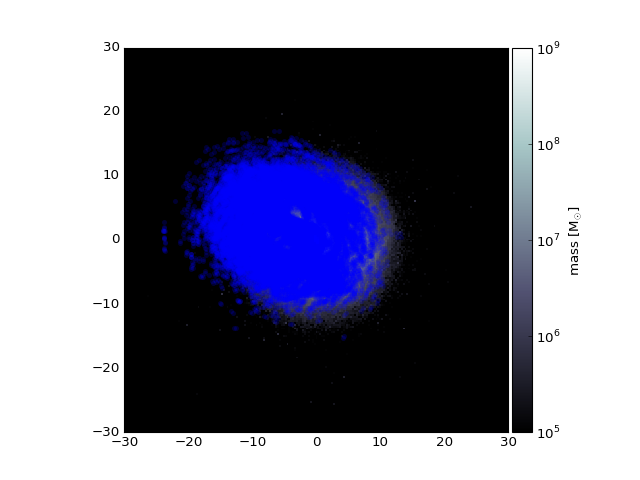

In [6]:
length = 30
fig, ax4 = plt.subplots()
ax4.set_xlim([-length,length])
ax4.set_ylim([-length,length])
SF1140_faceOn,edges= face_on_gs(myhalo,[-length,length],150)#H.T 
"""
mass_2 = ax4.imshow(SF1140_faceOn+1e5, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )

divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')
"""

SF1140_faceOn,edges = face_on_st(myhalo,[-length,length],200)#H.T 

mass_2 = ax4.imshow(SF1140_faceOn+1e3, interpolation='nearest', origin='low',cmap="bone",
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5,vmax=1e9)
                  )

divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')


ax4.scatter(myhalo.st.sf_info.pos3d[:,1],myhalo.st.sf_info.pos3d[:,0],lw=0,alpha=0.2)

In [7]:
print myhalo.st.sf_info.pos3d


[[ -13.82525274  -12.60369407   -5.6564274 ]
 [ -13.70409838  -12.85298125   -5.5829664 ]
 [ -11.33178426  -13.07037649   -4.38111047]
 ..., 
 [ 171.45637014   22.51472178   31.60086895]
 [ 171.31408009   25.1215002    31.16436974]
 [ 171.1254171    24.84481966   31.13269594]]
